# Regression Predict Student Solution

© Explore Data Science Academy

---


### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
## Spain Electricity Supply

The total consumption of 239.50 billion kWh of electric energy per year. Per capita this is an average of 5,061 kWh. Source: [worlddata](https://www.worlddata.info/europe/spain/energy-consumption.php)


Spain could provide itself completely with self-produced energy. The total production of all electric energy producing facilities is 259 bn kWh, which is 108% of the countries own usage. Despite this, Spain is trading energy with foreign countries. Along with pure consumptions the production, imports and exports play an important role. Other energy sources such as natural gas or crude oil are also used. In spite of this, Spain finds itself short of available electricity and ergo needs to plan for shortfalls as and when they occur. 

__Spain Climate Areas__
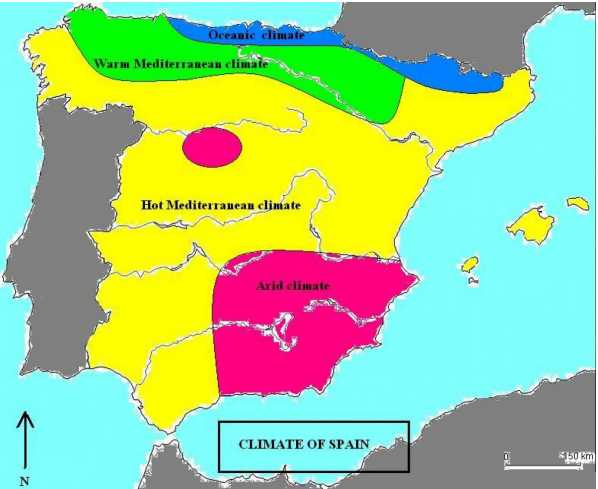

 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
Python libraries are collections of pre-written code that provide a wide range of functionalities and tools to accomplish specific tasks. These libraries are designed to be reusable, efficient, and easy to use.

In the context of machine learning, Python libraries such as NumPy, Pandas, Matplotlib, and Scikit-learn, among others, are commonly used to perform various tasks such as data processing, visualization, and building and training machine learning models.

Loading these libraries enables developers and data scientists to leverage pre-existing code to streamline their work and achieve their goals more efficiently. Rather than writing code from scratch, they can use pre-built functions and classes to perform complex tasks with ease. This allows them to focus on the more challenging aspects of their projects, such as data analysis and model optimization.

Overall, loading Python libraries is a crucial aspect of building and deploying machine learning models, as it allows developers to leverage the collective knowledge and experience of the broader community to accelerate their progress and achieve better results.

---

In [73]:
# Import missingno so that I can analyse missing data 
import missingno as msno

In [74]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # needed for visualisation 
import math
import random
from scipy import stats
import warnings

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

warnings.filterwarnings(action='once')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
We are going to use the train and test dataset for Spains Electricity supply, this will form the basis of the Regression predict. 

The train dataset contains 8,763 observations of Spains cities weather patterns and the load shortfall of electricity. There are 49 features in the train dataset. The cities that are included are Barcelona, Bilbao, Madrid, Seville and Valencia. The test dataset includes 2,920 observations.

In this step we are going to load the train & test data from the CSV file URL's.

---

In [75]:
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
Exploratory Data Analysis (EDA) is an important step in the machine learning process that involves understanding and summarizing the main characteristics of the data. It is the process of analyzing and visualizing the data to identify patterns, relationships, and anomalies. The purpose of EDA is to gain a better understanding of the data and to prepare it for modeling.

In the context of machine learning, EDA involves exploring the data set to determine the best approach for modeling it. This includes identifying which variables are relevant, which are not, and how they relate to each other. EDA can help identify data quality issues, such as missing values or outliers, that need to be addressed before building the model.

Some common techniques used in EDA include:

1. Summary statistics: such as mean, median, mode, standard deviation, and correlation coefficients.
2. Visualization: using graphs and charts such as histograms, scatter plots, and box plots to visualize the data and identify patterns.
3. Data cleaning: removing missing values, duplicates, and outliers from the data set.
4. Feature engineering: creating new variables or transforming existing ones to make them more relevant for modeling.
5. Dimensionality reduction: reducing the number of variables in the data set to make it easier to model.

In summary, exploratory data analytics is an essential step in the machine learning process that helps analysts understand the characteristics of the data and prepare it for modeling.

In terms of the spain analysis - the following weather indicators would directly impact the electricity consumption:

1. Temperature: Temperature is a key predictor of electricity demand, as it affects heating and cooling needs. Higher temperatures can lead to increased cooling demands, while lower temperatures can lead to increased heating demands.

2. Rain: Rain can impact the availability of hydroelectric power, as it affects water levels in reservoirs. In addition, heavy rain can cause power outages due to flooding and other weather-related damage.

3. Humidity: Humidity can impact electricity demand, as it affects how comfortable people feel. Higher humidity levels can make people feel hotter and more uncomfortable, leading to increased cooling demands.

4. Pressure: Pressure can impact wind generation, as higher pressure systems can lead to increased wind speeds.

5. Day of week as well as time of year and time of day would impact the electricity consumption.

The Spanish grid is mainly powered by combined cycle (gas), wind and nuclear power plants in 2022. 

The features were not available with all indicators across all cities - when it came to variable selection I chose variables that would support the above: temperature and wind speed.

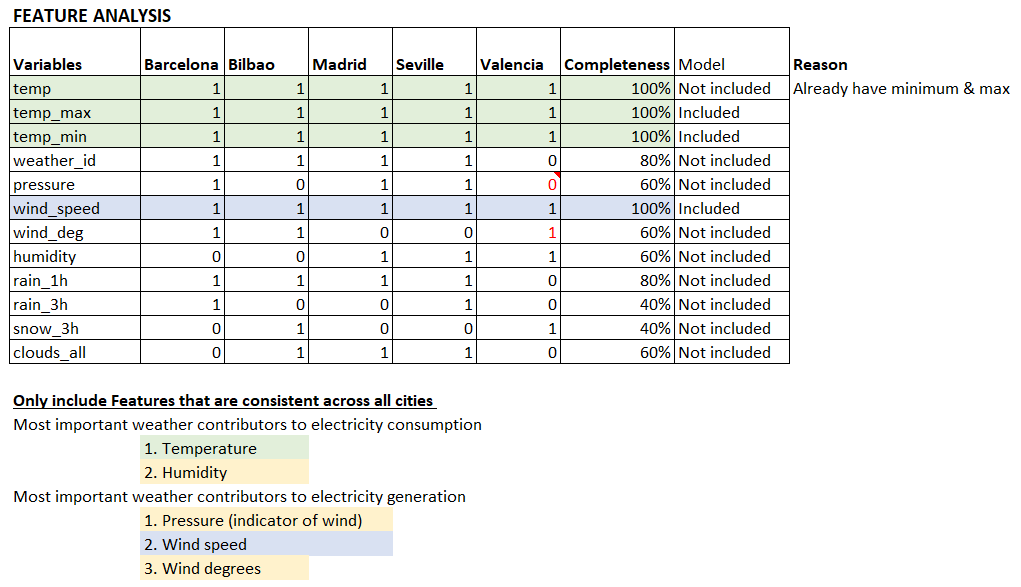

---


In [76]:
# look at data statistics
# First look at structure of df
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [77]:
# Second look at shape of dataframe i.e. how many rows and columns  
df_train.shape

(8763, 49)

In [78]:
# Third look at the information around the colums - type missing values etc, this identifies that we have 3 columns that are objects 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [79]:
# look at the data statistics 
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


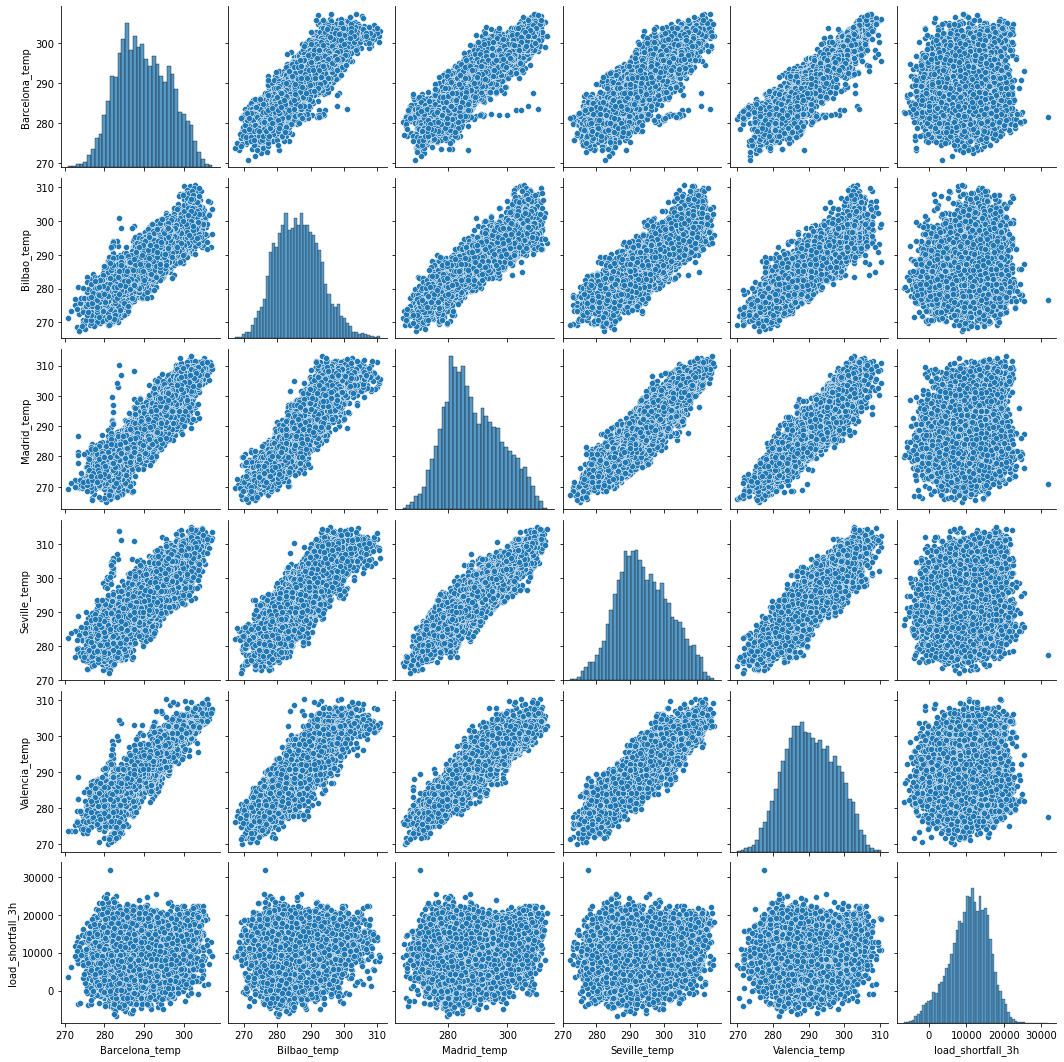

In [80]:
# plot relevant feature interactions for temperature 
sns.pairplot(df_train[['Barcelona_temp','Bilbao_temp', 'Madrid_temp', 'Seville_temp', 'Valencia_temp', 'load_shortfall_3h']])

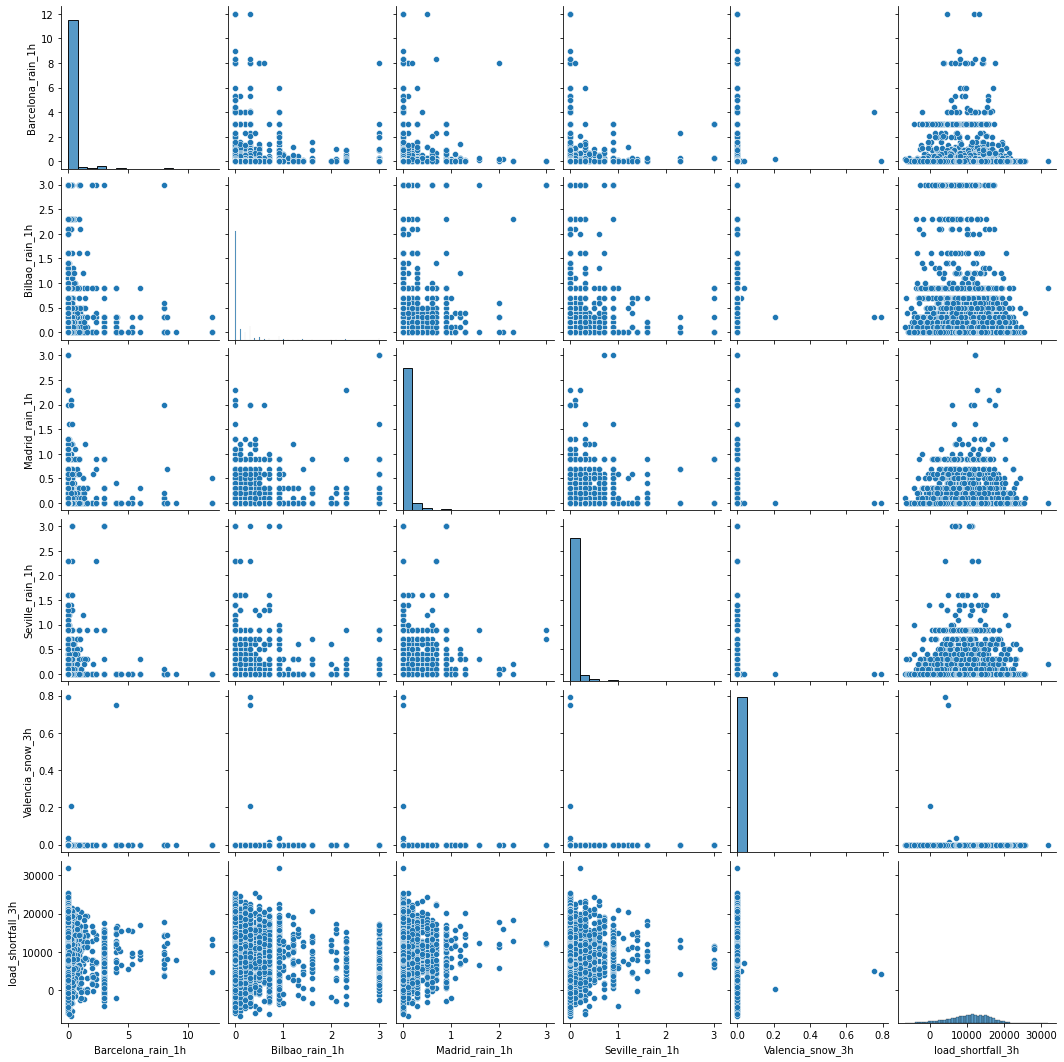

In [81]:
# plot relevant feature interactions for rain and snow 
sns.pairplot(df_train[['Barcelona_rain_1h','Bilbao_rain_1h', 'Madrid_rain_1h', 'Seville_rain_1h', 'Valencia_snow_3h', 'load_shortfall_3h']])

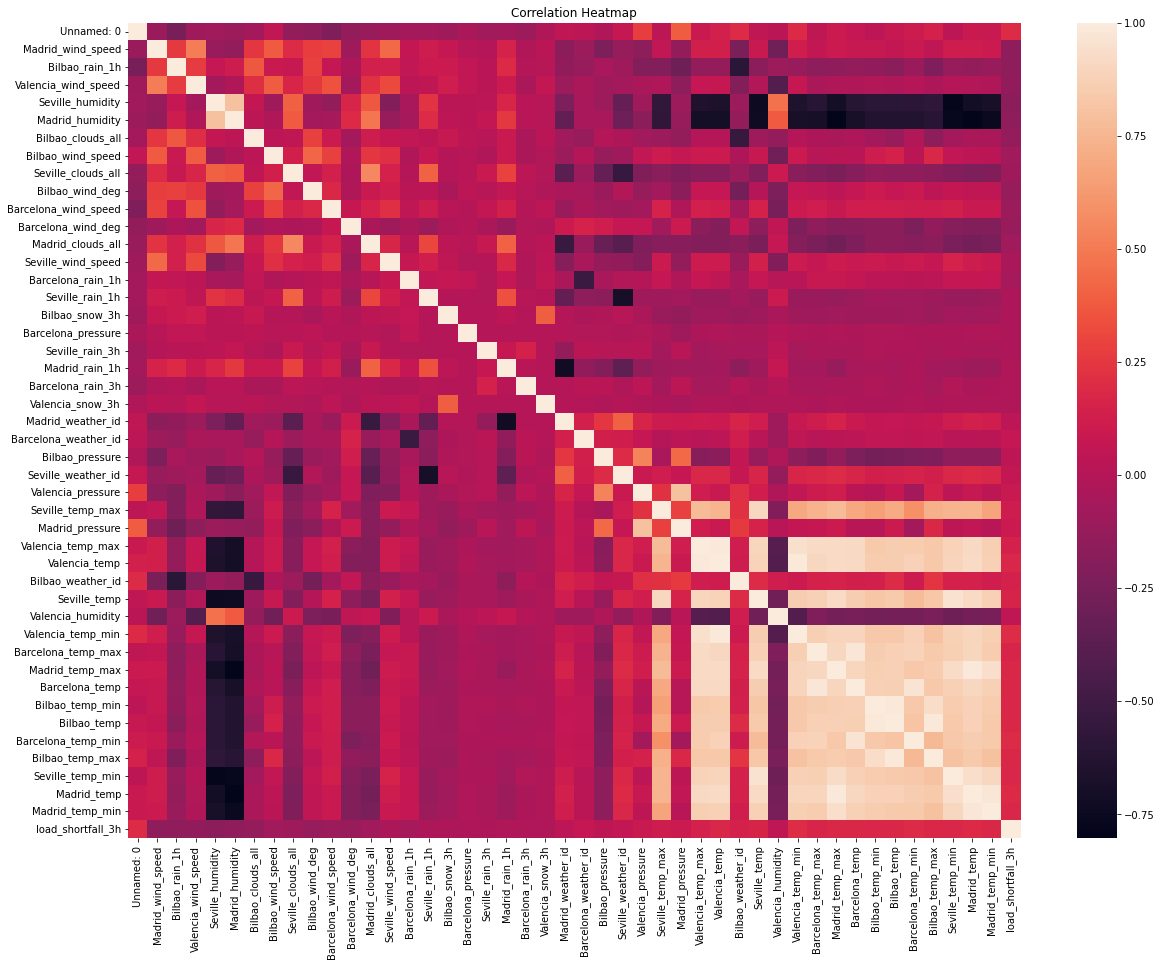

In [82]:
# evaluate correlation by completing a heatmap
#sns.heatmap(df_train.corr())
corr_matrix = df_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=False)
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:>

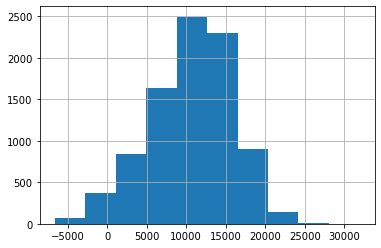

In [83]:
# have a look at feature distributions
df_train.load_shortfall_3h.hist()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
# 4.1 Identify missing values/ features and resolve
First step is to identify if features have missing data this can be done effectively with missingno, once the missing data has been identified, we then determined which data would best fit the model based on analysis of this features and other features. In this case the Valencia_pressure shows large amounts of missing data.

I analysed whether the pressure was related to the other variables available for Valencia but was unable to find a clear correlation so therefore calculated Mode, Mean and Median and used Mode to fill in the missing values.

# 4.2 Engineer existing features 
Three columns were identified as problematic in the EDA step:

1. Time - this was identified a an object rather than a datetime object. This column was changed to a datetime object and then split into the following variables (features) - Year, Month, Day, Hour and Day of week. Once the split was completed the 'time' feature was dropped.
2. Valencia wind degree feature was amended to exclude the 'string' portion and then convert to a numeric. 
3. Index - an unamed index was droped from the df. 

# 4.3 Create new features 

As identified in the previous step - additional features were added for 'time' these included 'Year', 'Month', 'Day', 'Hour' and 'Day_of_week'.

In addition the month was used to determine the season as well as whether a day of week is a weekend or weekday. 

A feature that needed to have dummy variables assigned was the 'Seville Pressure'which was also an object rather than a numerical field. 

---

<AxesSubplot:>

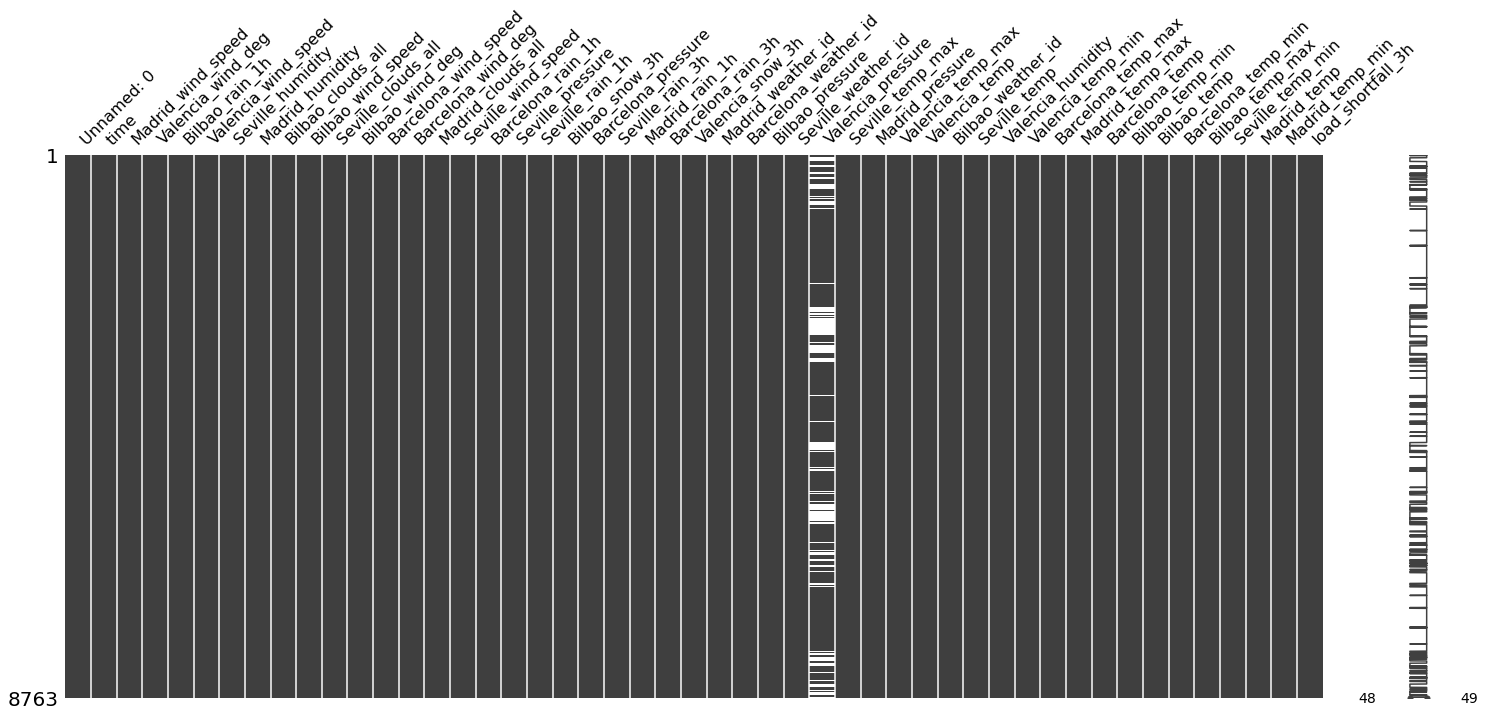

In [84]:
# 4.1.1 Identify missing values 
msno.matrix(df_train)

C:\Users\crosspau\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure', ylabel='Count'>

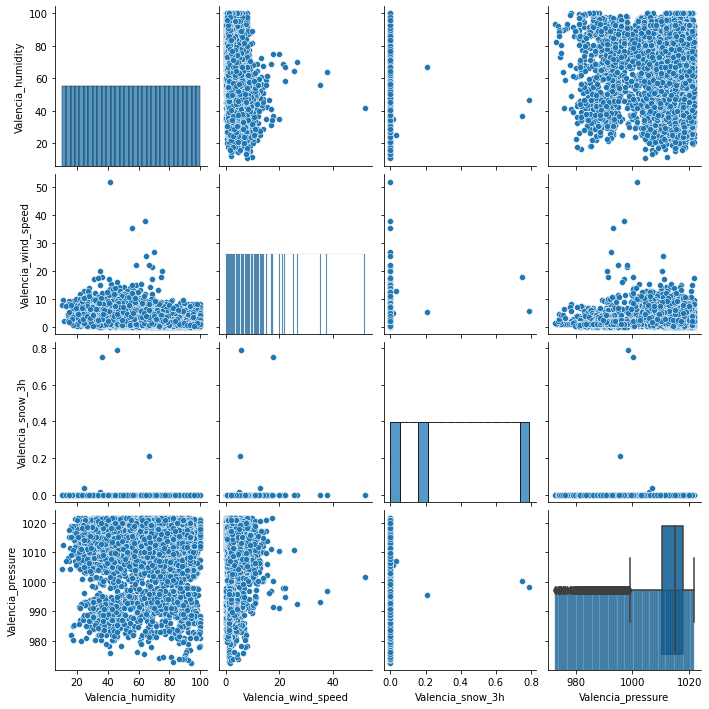

In [85]:
#4.1.2 Identify is there are interations on humidity, wind spped and pressure
sns.pairplot(df_train[['Valencia_humidity','Valencia_wind_speed', 'Valencia_snow_3h', 'Valencia_pressure']])
sns.boxplot(df_train['Valencia_pressure'])

In [86]:
#4.1.3 Identify the mode, mean and median
print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Median')
print(df_train['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.0514065222828
Median
1015.0


<AxesSubplot:>

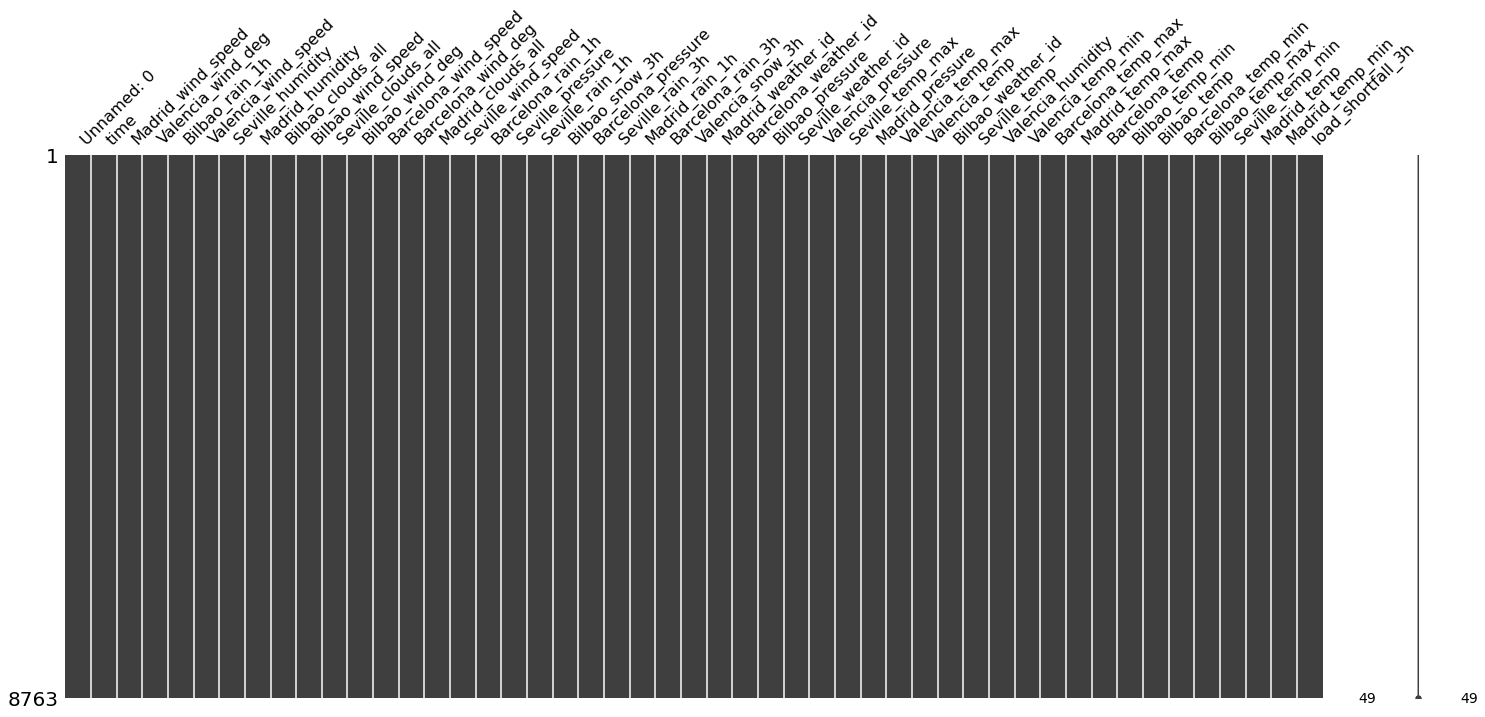

In [87]:
#4.1.4 Amend existing features
# No 1 Replace the nulls in Valencia_pressure with the mode
df_clean = df_train
vp_training_mode=df_clean['Valencia_pressure'].mean() #mode add[0] for first mode
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(vp_training_mode)
msno.matrix(df_train)

In [88]:
#No2 Convert time object to date time and convert object Valencia wind degrees by striping string & convert to numerical

df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
print(df_clean['time'].head())
df_clean.head()

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
2   2015-01-01 09:00:00
3   2015-01-01 12:00:00
4   2015-01-01 15:00:00
Name: time, dtype: datetime64[ns]


<>:4: DeprecationWarning: invalid escape sequence \d


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [89]:
#4.1.5 Create New features
# No 1 Split date into day time year etc 
df_clean['Year'] = df_clean['time'].dt.year
df_clean['Month'] = df_clean['time'].dt.month
df_clean['Day'] = df_clean['time'].dt.day
df_clean['Hour'] = df_clean['time'].dt.hour
df_clean['Day_of_week'] = df_clean['time'].dt.dayofweek
df_clean.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week
0,0,2015-01-01 03:00:00,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3
1,1,2015-01-01 06:00:00,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3
2,2,2015-01-01 09:00:00,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3
3,3,2015-01-01 12:00:00,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12,3
4,4,2015-01-01 15:00:00,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15,3


In [90]:
#No2 - Remove Features (index and time)
df_clean = df_clean.drop(['Unnamed: 0' , 'time'], axis = 1)
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6,3
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9,3
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.135063,285.394000,281.895219,281.895219,5075.666667,2015,1,1,12,3
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,282.252063,285.513719,280.678437,280.678437,6620.666667,2015,1,1,15,3


In [91]:
# No 3 - Add Season and weekday/ weekend
# add season
season_list = []
for month in df_clean['Month']:
    season = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
    season_list.append(season.get(month))
df_clean['Season'] = season_list

# add weekend weekday
day_type = []
for day in df_clean['Day_of_week']:
    daytype = {0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'}
    day_type.append(daytype.get(day))
df_clean['Day_type'] = day_type
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Day_of_week,Season,Day_type
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,265.938000,6715.666667,2015,1,1,3,3,Winter,Weekday
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,266.386667,4171.666667,2015,1,1,6,3,Winter,Weekday
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,272.708667,4274.666667,2015,1,1,9,3,Winter,Weekday
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,281.895219,5075.666667,2015,1,1,12,3,Winter,Weekday
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,280.678437,6620.666667,2015,1,1,15,3,Winter,Weekday


In [92]:
#No4 - Get dummy variables for non numerical data 
df_clean=pd.get_dummies(df_clean, drop_first=True)
df_clean.head()


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,0,0,0,0,0,0,0,0,1,0
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,0,0,0,0,0,0,0,0,1,0
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,0,0,0,0,0,0,0,0,1,0
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,0,0,0,0,0,0,0,0,1,0
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,0,0,0,0,0,0,0,0,1,0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
The steps in Modelling the data are as follows:
1. Create the target and the feature datasets with variable selection 
2. Standardise your data 
3. Split the data into test(unseen) and train(seen) datasets
4. Fit your train data to the various models
5. Evaluate your models using the unseen data (test dataset)

The models that I will be evaluating are as follows:

__Linear Regression Model__
Linear Regression is the process of finding a line that best fits the data points available on the plot, so that we can use it to predict output values for inputs that are not present in the data set we have, with the belief that those outputs would fall on the line.

__Decision Tree Model__
A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value.

__Random Forest Model__
Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 
Random Forest has multiple decision trees as base learning models. We randomly perform row sampling and feature sampling from the dataset forming sample datasets for every model. This part is called Bootstrap.

__Support Vector Regressor Model__
Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

__Ensemble Stacking Model__
where the outputs of multiple trained base models (sometimes called base learners) are fed into another model (referred to as a meta model or meta learner), is formally known as Stacking.

The base models used for the stacking model are the Linear Model, Decision tree and the Random Forest Model. 

These predictions - the outputs from the base learners - are used as the inputs for the meta learner model. The meta learner trains on these observations, using the labels from the validation set as the response variable. The meta learner is a Linear Regression model

Training the meta learner effectively teaches it how to 'blend' the outputs of each of the base learners together to produce a single prediction.


---

In [93]:
# create targets and features dataset

y = df_clean[['load_shortfall_3h']]
#x = df_clean.drop('load_shortfall_3h',axis=1)
X = df_clean[['Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_wind_speed',
              'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_wind_speed', 'Madrid_temp_max',
              'Madrid_temp_min', 'Madrid_wind_speed', 'Seville_temp_max', 'Seville_temp_min', 
              'Seville_wind_speed', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed', 
                'Month','Day','Hour', 'Day_of_week' ]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_speed,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_speed,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,Month,Day,Hour,Day_of_week
0,-1.394813,-1.218309,1.932284,-2.621665,-2.338357,-0.501451,-2.420380,-2.309892,-0.950708,-2.616796,-2.125118,0.542975,-2.835227,-2.892663,-0.796169,-1.602429,-1.675368,-1.090901,-0.00274
1,-1.456868,-1.292271,0.630270,-2.475661,-2.183645,-0.501451,-2.374370,-2.261154,-1.130863,-2.539014,-2.040702,0.542975,-2.591966,-2.626219,-0.381412,-1.602429,-1.675368,-0.654451,-0.00274
2,-1.316350,-1.124792,-0.485743,-1.821036,-1.489980,-0.501451,-1.726058,-1.574407,-0.770554,-2.105564,-1.570279,0.144442,-1.761812,-1.716949,-0.657917,-1.602429,-1.675368,-0.218001,-0.00274
3,-1.061929,-0.821553,-0.299741,-0.961406,-0.579082,-0.501451,-0.783992,-0.576488,-0.770554,-1.361703,-0.762967,0.941509,-0.850953,-0.719283,-0.657917,-1.602429,-1.675368,0.218449,-0.00274
4,-0.954814,-0.693885,0.816272,-0.804197,-0.412497,-0.894581,-0.908771,-0.708665,-0.770554,-1.348214,-0.748327,0.343708,-1.100044,-0.992113,-0.657917,-1.602429,-1.675368,0.654899,-0.00274


In [94]:
# split data
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

C:\Users\crosspau\AppData\Local\Temp\ipykernel_6792\2351972162.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


<AxesSubplot:>

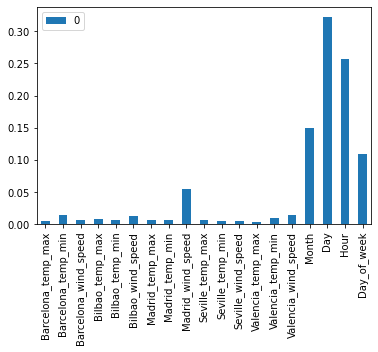

In [95]:
# Our forest consists of 100 trees with a max depth of 5 in this example
rf = RandomForestRegressor(n_estimators=100, max_depth=6)
rf.fit(x_train,y_train)
#Get the feature importances
feature_names = x_train.columns
feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names)
feature_importance.plot(kind = 'bar')


In [96]:
# create one or more ML models
lr_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=4, min_impurity_decrease=0.02)
sv_reg = SVR(kernel='rbf', gamma='auto')

lr_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
sv_reg.fit(x_train,y_train)

C:\Users\crosspau\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma='auto')

In [97]:
# evaluate one or more ML models
lr_preds = lr_model.predict(x_test)
tree_preds = tree_model.predict(x_test)
sv_preds = sv_reg.predict(x_test)
rf_preds = rf.predict(x_test)

In [98]:
# Create a stacking ensemble model 
# For clarity, we declare our model list again here 
models = [("LR",lr_model), ("DT", tree_model), ("RF", rf)]

# Instead of choosing model weightings, we now declare the meta learner model for our stacking ensemble. 
# Here we choose to use a simple linear regression 
meta_learner_reg = LinearRegression()
# meta_learner_reg = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=4, min_impurity_decrease=0.02)

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

s_reg.fit(x_train,y_train)

s_reg_pred = s_reg.predict(x_test)

C:\Users\crosspau\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In order to determine the best performing model we compare the RMSE across the various models. The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy). Lower values of RMSE indicate better fit. 

R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model. An R-squared value closer to one indicates how well a model performs.

---

In [99]:
# Define a performance function

def rmse(y_test, y_predict):
    #rmse_val=np.sqrt(mean_squared_error(y_test, y_predict))
    print('RMSE:', round(np.sqrt(mean_squared_error(y_test, y_predict)),2))
    print('R-squared:', round(r2_score(y_test, y_predict),4))
    pass
    #return rmse_val

In [100]:
# Compare linear model 
rmse(y_test, lr_preds)

RMSE: 4798.88
R-squared: 0.161


In [101]:
# Compare decision tree model 
rmse(y_test, tree_preds)

RMSE: 4378.48
R-squared: 0.3016


In [102]:
# Compare Support Vector Regressor model 
rmse(y_test, sv_preds)

RMSE: 5242.41
R-squared: -0.0012


In [103]:
# Compare Random Forest Model 
rmse(y_test, rf_preds)

RMSE: 3727.5
R-squared: 0.4938


In [104]:
# Compare Stacking Ensemble method
rmse(y_test, s_reg_pred)

RMSE: 3595.17
R-squared: 0.5291


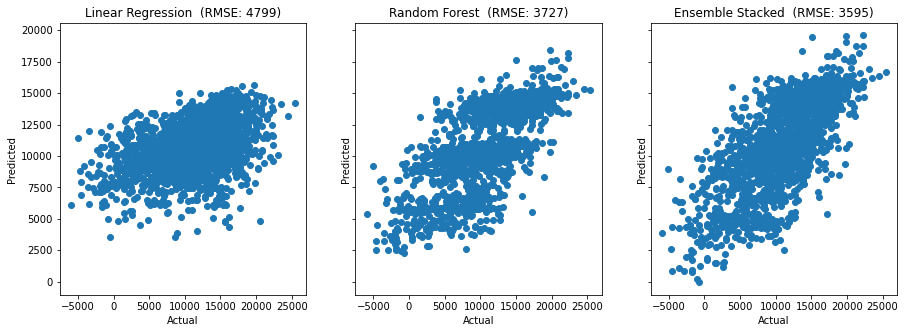

In [105]:
# Choose best model and motivate why it is the best choice
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [lr_model.predict(x_test), rf.predict(x_test), s_reg.predict(x_test)]
title = ['Linear Regression','Random Forest', 'Ensemble Stacked']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    #ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

__Model Selection__

Out of the five models that were run the best performing mode is the Ensemble stacked model which takes the Linear Model, Decision Tree and Random Forest as base models and then combines them in the meta learner as a Linear Model. 

## Kaggle Submission

In [106]:
# Ensure test data has been amended like train data 
df_test.head()

output = pd.DataFrame({"time":df_test['time']})

df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(vp_training_mode)
df_test['time'] = pd.to_datetime(df_test['time'])
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])
df_test['Year'] = df_test['time'].dt.year
df_test['Month'] = df_test['time'].dt.month
df_test['Day'] = df_test['time'].dt.day
df_test['Hour'] = df_test['time'].dt.hour
df_test['Day_of_week'] = df_test['time'].dt.dayofweek
df_test = df_test.drop(['Unnamed: 0' , 'time'], axis = 1)
season_list = []
for month in df_test['Month']:
    season = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
    season_list.append(season.get(month))
df_test['Season'] = season_list

day_type = []
for day in df_test['Day_of_week']:
    daytype = {0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'}
    day_type.append(daytype.get(day))
df_test['Day_type'] = day_type

df_test=pd.get_dummies(df_test, drop_first=True)
df_test.head()


<>:8: DeprecationWarning: invalid escape sequence \d


,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9,Season_Spring,Season_Summer,Season_Winter,Day_type_Weekend
0,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,0,0,0,0,0,0,0,0,1,0
1,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,0,0,0,0,0,0,0,0,1,0
2,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,0,0,0,0,0,0,0,0,1,0
3,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,0,0,0,0,0,0,0,0,1,0
4,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,0,0,0,0,0,0,0,0,1,0


In [107]:
# Fit the test data to the Random forest model
df_test = df_test[['Barcelona_temp_max', 'Barcelona_temp_min', 'Barcelona_wind_speed',
              'Bilbao_temp_max', 'Bilbao_temp_min', 'Bilbao_wind_speed', 'Madrid_temp_max',
              'Madrid_temp_min', 'Madrid_wind_speed', 'Seville_temp_max', 'Seville_temp_min', 
              'Seville_wind_speed', 'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_speed', 
                'Month','Day','Hour', 'Day_of_week' ]]
test_pred=s_reg.predict(df_test)
test_pred

array([ 8944.93340388,  4022.73358276,  3585.10651848, ...,
       15861.55196972, 16031.85836207, 16254.21113073])

In [108]:
# Ensure predictions are output to load shortfall_3H
output['load_shortfall_3h']=test_pred   
output.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8944.933404
1,2018-01-01 03:00:00,4022.733583
2,2018-01-01 06:00:00,3585.106518
3,2018-01-01 09:00:00,6630.697508
4,2018-01-01 12:00:00,8885.376460


In [109]:
#Output to csv for Kaggle 
output.to_csv("predict_v8.csv",index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
The chosen model is made up of an Ensemble model which includes the following models as base models: Linear Regression, Decision Tree and Random forest.   
 
---

In [110]:
# discuss chosen methods logic